<a href="https://colab.research.google.com/github/liuy57/Final-project-code/blob/master/Copy_of_Copy_of_Copy_of_final_2019_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tech Fundamentals Final
# enter your name here

"I pledge under the RPI honor code that I have completed this work on my own." 

At any time a monitor may ask you to scroll up to the top of this document to view this. 


Yitian Liu

In [0]:
#This just gets the data and preps the environment. 
data="https://www.dropbox.com/s/7kbq1hi31a7tnzt/data.zip"

In [0]:
!wget $data

In [0]:
!unzip -o data.zip

This is healthcare data generated from a syntetic data generator.  We want to see how good it is. 

In [4]:
#Let's list the files
!ls ./data/ma


allergies.csv	encounters.csv	     medications.csv	patients.csv
careplans.csv	imaging_studies.csv  observations.csv	procedures.csv
conditions.csv	immunizations.csv    organizations.csv	providers.csv


In [0]:
#Let's look at one of the dataframes
import numpy as np
import pandas as pd
careplans_ma= pd.read_csv('./data/ma/careplans.csv')
careplans_ny= pd.read_csv('./data/ny/careplans.csv')
careplans_ma


# Exploratory Data Analysis 

The data directory includes a wide variety of data related to health care.  
    
(1. 5 points) Find the mean of the `COST` varaiable in the `encounters.csv` data for both NY and MA, assigning the values to `cost_ny` and `cost_ma`.   





In [6]:
# Answer 1
import numpy as np
import pandas as pd
#Load the data
encounters_ma= pd.read_csv('./data/ma/encounters.csv')
encounters_ny= pd.read_csv('./data/ny/encounters.csv')
cost_ma=np.mean(encounters_ma["COST"]) # Fix this to calculate the mean of the cost. (5 points)
cost_ny=np.mean(encounters_ny["COST"]) #Fix this to calculate the mean of the cost. (5 points)
print( cost_ma, cost_ny)
print ("___", "    If you are seeing a face, probably aren't there yet. ")




17.906257207081175 15.188246329742485
___     If you are seeing a face, probably aren't there yet. 


# Cost Regression Analysis

### Dummy Creation and Splint to Train and Test for NY ONLY 

The goal of the code below is to predict the `COST` from `CODE` and `ENCOUNTERCLASS`.  


(2. 5 points) First create dummies from `CODE` and `ENCOUNTERCLASS`.  Don't use any other variables.  split your data into an 70% train and 30% validation using a `random_state` of 111. For validation, set: 

```
splittest1 = X_train.iloc[5,2]

splittest2 = X_test.iloc[7,4]
```




In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
#Create Dummies. Also set  dummy_na = True
X = encounters_ny
pd.get_dummies(X[['CODE']],dummy_na = True)
pd.get_dummies(X[['ENCOUNTERCLASS']],dummy_na = True)

y ='COST'
#X_train, X_test, y_train, y_test is the naming you should use
#verify split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size=0.3,
                                                    random_state=111)


splittest1 = X_train.iloc[5,2]
splittest2 = X_test.iloc[7,4]
 
#keep this code used for testing. 
splittest1 = X_train.shape
splittest2 = X_test.iloc[7,4]
print(splittest1, splittest2)

ValueError: ignored

### Predict Cost via Linear Regression 

(3. 5 points) Using linear regression analysis, use the `CODE` and `ENCOUNTERCLASS` as independent variables to predict `COST`. This is your naive model. Report R-Squared for both training `r2_train_cost` and validation `r2_test_cost`. 




In [23]:
#3 Answer
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit( X_train, y_train)

from sklearn.metrics import r2_score
r2_train_base= r2_score(y_train, y_train_base)
r2_train_reg = r2_score(y_train, lm.predict(X_train))

r2_test_base = r2_score(y_test, y_test_base)
r2_test_reg = r2_score(y_test, lm.predict(X_test))
 
r2_train_cost = r2_train_base # Make equal to the R2. 
#r2_test_cost = 0# Make equal to the R2. 

#Keep this
print('R2 for Train:', r2_train_cost)
print('R2 for Test (cross validation)：', r2_test_cost )

NameError: ignored

# Create Graph of Encounter class vs Cost

(4. 5 points) Create a graph of encounter class vs cost. It should look like the graph below (created via seaborn). 


In [0]:
%matplotlib inline

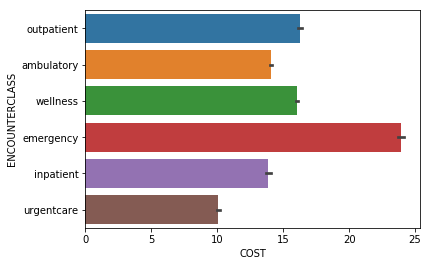

In [25]:
#4 Answer
import seaborn as sns
sns.barplot(x="COST", y="ENCOUNTERCLASS", data=encounters_ny);

When you are done your graph should look like this.  

ENCOUNTERCLASS is on they axis and  and COST on X axis.

![Imgur](https://i.imgur.com/asCDZSM.png)


# High Cost Patients Classification 

A second Challenge is determinine the most expensive individuals.  This is set as all those groups that are more than 1 standard deviation above the mean, indicated as 'HIGHCOST' in the dataset.  

(5. 5 points) 
Overall, count the total number of individuals who are high cost in NY (i.e., where encounters_ny['HIGHCOST'] is equal to 1.) Assign to the value `total_high_cost_ny`. 

Overall, count the total number of individuals who are high cost in MA (i.e., where encounters_ny['HIGHCOST'] is equal to 1.) Assign to the value `total_high_cost_ma`. 




In [26]:
#5 Answer 
total_high_cost_ny=np.sum(encounters_ny['HIGHCOST']==1)  #set to the sum
total_high_cost_ma=np.sum(encounters_ma['HIGHCOST']==1) #set to the sum

print(total_high_cost_ny, total_high_cost_ma)

21558 22505


### Split the Train and test set for Classification with you DV set to HIGHCOST for NY Only. 


(6. 5 points) First split your data into an 70% train and 30% validation. Make sure that the results are *stratified* (equal classes in train and test) with `random_state = 111`.  

Also set the following:

```
splittest3 = y_train.iloc[5]
splittest4 = y_test.iloc[3]
```


In [27]:
#6 Answer 
from sklearn.model_selection import train_test_split
#Set y equal to train encounters_ny['HIGHCOST'] 
y = encounters_ny['HIGHCOST']
#X_train, X_test, y_train, y_test  is the naming you should use
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size=0.3,
                                                    random_state=111)
#This will be used for testing. Keep it. 
splittest3 = y_train.iloc[3]
splittest4 = y_test.iloc[17]
print (splittest3, splittest4)

0 0


### Classification with Random Forrest
(8. 5 points) Use a RandomForestClassifier to predict the 'HIGH_COST' with use the `CODE` and `ENCOUNTERCLASS` as independent variables.  

Also set the following:

```
train_accuracy
test_accuracy
```

In [29]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import os
from sklearn.feature_extraction.text import CountVectorizer

forest = RandomForestClassifier(n_estimators = 100)
forest = forest.fit( train_data_features, X_train["CODE"] )

train_accuracy = 0#set to the accuracy
test_accuracy = 0 #set to the accuracy
#Keep this.
print("Classifier Accuracy for Train: ", train_accuracy )
print("Classifier Accuracy for Test: ", test_accuracy )

NameError: ignored

### Submission
For the final submission, please submit a link to this notebook to the LMS as a `.ipynb` file.  The TA must be able to run your notebook.  

### Please make sure that your notebook above this point runs without errors.  